# Webscrapping Menggunakan BeautifulSoup

Pada Capstone kali ini saya akan mencoba Webscrapping Data kurs Japan Yen ke rupiah pada tahun 2019 dari link : monexnews.com/kurs-valuta-asing.htm?kurs=JPY
Dari halaman tersebut saya akan mencari :
    1. Kurs jual, Kurs beli dan tanggal
    2. Membuat plot pergerakan kurs JPY pada tahun 2019 
    
 Yang pertama kali saya lakukan adalah mengimport library yang dibutuhkan

In [ ]:
import pandas as pd
import requests
import dateparser
from bs4 import BeautifulSoup

Langkah selanjutnya yaitu saya menjalankan url_get untuk webscrapping Data kurs Japan Yen ke Rupiah pada tahun 2019 dari link: https://monexnews.com/kurs-valuta-asing.htm?kurs=JPY&searchdatefrom=01-01-2019&searchdateto=01-12-2019

In [87]:
url_get = requests.get('https://monexnews.com/kurs-valuta-asing.htm?kurs=JPY&searchdatefrom=01-01-2019&searchdateto=01-12-2019')
url_get.content[1:777]

b'!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">\n<html xmlns="http://www.w3.org/1999/xhtml">\n<head>\n<meta http-equiv="Content-Language" content="en,in" />\n<link rel="alternate" href="https://monexnews.com/kurs-valuta-asing.php" hreflang="en-ID" />\n<base href="https://monexnews.com/" target="_self" />\n<title>Kurs Yen Jepang | JPY | Harga Nilai Tukar Yen Hari Ini | Monexnews</title>\n<meta name="description" content="Kurs yen jepang JPY, nilai tukar rupiah terhadap harga yen hari ini berdasar kurs tengah BI, Bank Indonesia. " />\n<meta name="keywords" content="Kurs yen, jpy, nilai tukar yen, monexnews" />\n<meta property="og:image" content="favicon.jpg" />\n<meta name="author" content="Ultimaengine.co'

Dari hasil url_get saya mendapatkan html yang tidak terstruktur dan kompleks, Maka dari itu saya membutuhkan beautifulsoup untuk dapat membaca kode html tersebut dengan baik. Beatifulsoup tersebut dapat mengubah dokumen HTML yang tidak terstruktur dan komplek menjadi codingan Python. Maka selanjutnya saya akan menjalan objek BeatifulSoup untuk dapat membaca html tersebut 

In [88]:
soup = BeautifulSoup(url_get.content,"html.parser")
print(type(soup))

<class 'bs4.BeautifulSoup'>


In [89]:
print(soup.prettify()[:1045])

<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">
<html xmlns="http://www.w3.org/1999/xhtml">
 <head>
  <meta content="en,in" http-equiv="Content-Language"/>
  <link href="https://monexnews.com/kurs-valuta-asing.php" hreflang="en-ID" rel="alternate"/>
  <base href="https://monexnews.com/" target="_self"/>
  <title>
   Kurs Yen Jepang | JPY | Harga Nilai Tukar Yen Hari Ini | Monexnews
  </title>
  <meta content="Kurs yen jepang JPY, nilai tukar rupiah terhadap harga yen hari ini berdasar kurs tengah BI, Bank Indonesia. " name="description"/>
  <meta content="Kurs yen, jpy, nilai tukar yen, monexnews" name="keywords"/>
  <meta content="favicon.jpg" property="og:image"/>
  <meta content="Ultimaengine.com" name="author"/>
  <meta content="follow, index" name="robots"/>
  <meta content="7 days" name="revisit-after"/>
  <meta content="width=device-width, initial-scale=1.0" name="viewport"/>
  <meta content="M7NOlgqcEadhl

Setelah menggunakan BeautifulSoup saya sudah memiliki HTML yang lebih rapi dan bisa dibaca. Kemudian saya akan mencari baris data yang ingin kita ambil informasinya.
Informasi yang saya butuhkan dalam web monexnews adalah pergerakan YEN kurs beli maupun kurs jual setiap bulan Januari-Desember selama tahun 2019, informasi tersebut terbungkus dalam tabel. Dan untuk mengetahui bagian mana dari kode yang merujuk informasi kurs beli dan kurs jual selama tahun 2019, saya mmemindahkan cursor nya mengacu ke informasi tersebut. Informasi tersebut berada di nama tabel = 'tabel'
Dari tabel baris dengan kelas `table`. Saya menggunakan metode find di objek beautifusoup dan saya memanggil objek tersebut untuk melihat apa yang kita dapatkan

In [90]:
table = soup.find('table', attrs={'class':'table'})
print(table.prettify()[1:500])

table class="table">
 <tr>
  <td>
   TANGGAL
  </td>
  <td>
   ASK
  </td>
  <td>
   BID
  </td>
 </tr>
 <tr class="verySoftGreyBg">
  <td>
   29 November 2019
  </td>
  <td>
   129,44
  </td>
  <td>
   128,12
  </td>
 </tr>
 <tr>
  <td>
   28 November 2019
  </td>
  <td>
   129,47
  </td>
  <td>
   128,15
  </td>
 </tr>
 <tr class="verySoftGreyBg">
  <td>
   27 November 2019
  </td>
  <td>
   129,84
  </td>
  <td>
   128,53
  </td>
 </tr>
 <tr>
  <td>
   26 November 2019
  </td>
  <td>
   129,


Seperti yang dapat di lihat, saya telah menemukan baris yang tepat dengan informasi yang syaya inginkan.
Dengan Mengacu :

- `th` singkatan dari header tabel / sel header
- `tr` singkatan baris tabel
- `td` singkatan dari sel standar

Itu semua istilah yang ada pada dalam kelas 'tabel' pada HTML monexnews. Sekarang saya dapat menariknya satu per satu informasi yang saya butuhkan, dan saya akan menggunakan perulangan untuk membuat informasi yang saya inginkan lebih mudah. Tapi pertama-tama mari saya membuat satu objek yang akan menemukan semua `tr` di` tabel` untuk membantu kita dalam perulangan (sehingga saya dapat mengulang dengan panjang baris tabel).

In [92]:
tr = table.find_all('tr')
tr[:2] # just call 2 founded tr

[<tr>
 <td>TANGGAL</td>
 <td>ASK</td>
 <td>BID</td>
 </tr>, <tr class="verySoftGreyBg">
 <td>29 November 2019</td>
 <td>129,44</td>
 <td>128,12</td>
 </tr>]

Kemudian saya melakukan perulangan untuk mengambil informasi yang saya butuhkan.
1. Saya membuat fungsi 'temp' untuk menerima informasi yang ingin saya simpan
2. Kemudian kita akan membuat satu lingkaran (loop) dari satu sampai panjang baris tabel
3. Dari kelas tabel saya membutuhkan Tanggal, ASK dan BID
4. Tanggal saya berikan nama tanggal, ASK saya berikan nama Kurs_Jual dan BID saya berikan nama Kurs_Beli


In [93]:
temp = [] #initiating a tuple

for i in range(1, len(tr)):
    row = table.find_all('tr')[i]
    
    #get tanggal
    Tanggal = row.find_all('td')[0].text
    Tanggal = Tanggal.strip('') #for removing the excess whitespace

    
    #get ask
    Kurs_Jual = row.find_all('td')[1].text
    Kurs_Jual = Kurs_Jual.strip() #for removing the excess whitespace
    
    #get BID
    Kurs_Beli = row.find_all('td')[2].text
    Kurs_Beli = Kurs_Beli.strip() #for removing the excess whitespace
    
    
    temp.append((Tanggal,Kurs_Jual,Kurs_Beli)) 
    
temp 

[('29\xa0November\xa02019', '129,44', '128,12'),
 ('28\xa0November\xa02019', '129,47', '128,15'),
 ('27\xa0November\xa02019', '129,84', '128,53'),
 ('26\xa0November\xa02019', '129,82', '128,49'),
 ('25\xa0November\xa02019', '130,20', '128,89'),
 ('22\xa0November\xa02019', '130,44', '129,10'),
 ('21\xa0November\xa02019', '130,73', '129,39'),
 ('20\xa0November\xa02019', '130,56', '129,23'),
 ('19\xa0November\xa02019', '130,34', '129,03'),
 ('18\xa0November\xa02019', '130,02', '128,70'),
 ('15\xa0November\xa02019', '130,23', '128,90'),
 ('14\xa0November\xa02019', '130,34', '129,01'),
 ('13\xa0November\xa02019', '129,86', '128,53'),
 ('12\xa0November\xa02019', '129,45', '128,15'),
 ('11\xa0November\xa02019', '129,37', '128,07'),
 ('08\xa0November\xa02019', '129,03', '127,73'),
 ('07\xa0November\xa02019', '129,71', '128,41'),
 ('06\xa0November\xa02019', '128,96', '127,64'),
 ('05\xa0November\xa02019', '129,67', '128,34'),
 ('04\xa0November\xa02019', '130,04', '128,71'),
 ('01\xa0November\xa

Setelah mendapatkan informasi yang dibutuhkan, saya perlu membalik tanggal tersebut menjadi tanggal terkecil ke besar. Contoh hasil yang dapat dimulai dari bulan November, padahal saya memperlukan dari bulan Januari.
Sehingga dari hasil 'temp' sayang menggunakan temp[::-1], untuk mengubah bulan tersebut.

In [94]:
temp = temp[::-1]
temp

[('02\xa0Januari\xa02019', '132,89', '131,54'),
 ('03\xa0Januari\xa02019', '135,44', '134,08'),
 ('04\xa0Januari\xa02019', '133,51', '132,17'),
 ('07\xa0Januari\xa02019', '130,86', '129,51'),
 ('08\xa0Januari\xa02019', '129,84', '128,52'),
 ('09\xa0Januari\xa02019', '130,31', '129,00'),
 ('10\xa0Januari\xa02019', '131,22', '129,88'),
 ('11\xa0Januari\xa02019', '130,62', '129,31'),
 ('14\xa0Januari\xa02019', '130,52', '129,19'),
 ('15\xa0Januari\xa02019', '130,56', '129,23'),
 ('16\xa0Januari\xa02019', '131,11', '129,75'),
 ('17\xa0Januari\xa02019', '130,61', '129,27'),
 ('18\xa0Januari\xa02019', '130,37', '129,03'),
 ('21\xa0Januari\xa02019', '130,31', '128,98'),
 ('22\xa0Januari\xa02019', '130,39', '129,07'),
 ('23\xa0Januari\xa02019', '130,05', '128,75'),
 ('24\xa0Januari\xa02019', '129,79', '128,48'),
 ('25\xa0Januari\xa02019', '129,68', '128,37'),
 ('28\xa0Januari\xa02019', '128,97', '127,65'),
 ('29\xa0Januari\xa02019', '129,74', '128,43'),
 ('30\xa0Januari\xa02019', '129,79', '12

Kemudian dari 'temp' diatas saya masukan ke pandas dengan menggunakan dataframe 

In [95]:
df = pd.DataFrame(temp, columns= ('Tanggal', 'Kurs_Jual', 'Kurs_Beli'))
df.head(10)

,Tanggal,Kurs_Jual,Kurs_Beli
0,02 Januari 2019,"132,89","131,54"
1,03 Januari 2019,"135,44","134,08"
2,04 Januari 2019,"133,51","132,17"
3,07 Januari 2019,"130,86","129,51"
4,08 Januari 2019,"129,84","128,52"
5,09 Januari 2019,"130,31","129,00"
6,10 Januari 2019,"131,22","129,88"
7,11 Januari 2019,"130,62","129,31"
8,14 Januari 2019,"130,52","129,19"
9,15 Januari 2019,"130,56","129,23"


Setelah saya dataframe informasi dari temp. Saya ingin mengganti tipe data tanggal, kurs_jual dan kurs_beli yang sebelumnya object menjadi datetime dan float. 
1. Pertama saya mengganti Kurs_Jual dan kurs_beli yang sebelumnya memakai koma (,) saya ganti menjadi titik (.) agar bisa diganti dengan tipe data float. Setelah direplace koma (,) dengan titik (.) saya mengganti kurs_jual dan kurs_beli dengan astype('float64')
2. Setelah mengganti kurs_jual dan kurs_beli saya ingin menggati tanggal menjadi datetime dengan library dateparser. Karena tanggal pada temp memakai tipe object dan berbahasa Indonesia, dengan menggunakan dateparser dapat mengubah tanggal bahasa Indonesia menjadi bahasa Python.

In [116]:
df['Kurs_Jual'] = df['Kurs_Jual'].str.replace(",",".")
df['Kurs_Beli'] = df['Kurs_Beli'].str.replace(",",".")
df['Kurs_Jual'] = df['Kurs_Jual'].astype('float64')
df['Kurs_Beli'] = df['Kurs_Beli'].astype('float64')
df['Tanggal'] = df['Tanggal'].apply(lambda x: dateparser.parse(x))
df.dtypes

Tanggal      datetime64[ns]
Kurs_Jual           float64
Kurs_Beli           float64
dtype: object

Dan langkah terakhir setelah mendapatkan informasi yang dibutuhkan dengan tipe data yang kita inginkan. Saya mengganti fungsi df tersebut menjadi grafik dengan cara df.plot(0).

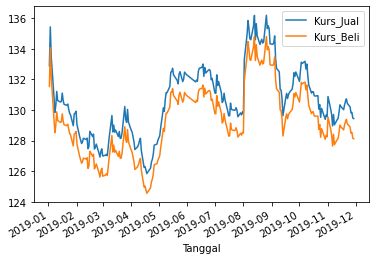

In [120]:
df.plot(0)

# Kesimpulan

Dari plot diatas dapat diketahui bahwa pada pertengah bulan April tahun 2019 Kurs Beli Yen terhadap rupiah sangatlah lemah. Pada Pertengahan bulan April tahun 2019 merupakan titik terendah Kurs Beli dan Kurs Jual Yen selama tahun 2019, sedangkan pada awal bulan Agustus hingga Pertengahan Oktober merupakan titik tertinggi Kurs Beli dan Kurs Jual Yen dan tiba-tiba turun dratis di pertengahan Oktober tersebut.